In [19]:
import numpy as np
import pandas as pd
import pickle

from sklearn.metrics import r2_score

from analise_data_ru import ROOT_PATH
from analise_data_ru.plot import get_almoco_and_janta_plot

In [20]:
train_df = pd.read_csv(ROOT_PATH / 'data' / 'processed' / 'train_data.csv')
test_df = pd.read_csv(ROOT_PATH / 'data' / 'processed' / 'test_data.csv')

In [21]:
train_df

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
0,2016-01-04,2016,1,0,4,364,294
1,2016-01-05,2016,1,1,5,489,363
2,2016-01-06,2016,1,2,6,522,401
3,2016-01-07,2016,1,3,7,514,349
4,2016-01-08,2016,1,4,8,409,218
...,...,...,...,...,...,...,...
894,2019-10-29,2019,10,1,29,836,550
895,2019-10-30,2019,10,2,30,866,567
896,2019-10-31,2019,10,3,31,782,539
897,2019-11-01,2019,11,4,1,640,333


In [22]:
test_df.tail(10)

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
70,2020-03-02,2020,3,0,2,847,614
71,2020-03-03,2020,3,1,3,1033,687
72,2020-03-04,2020,3,2,4,830,608
73,2020-03-05,2020,3,3,5,944,691
74,2020-03-06,2020,3,4,6,823,353
75,2020-03-09,2020,3,0,9,843,639
76,2020-03-10,2020,3,1,10,1001,626
77,2020-03-11,2020,3,2,11,1002,611
78,2020-03-12,2020,3,3,12,953,549
79,2020-03-13,2020,3,4,13,795,410


In [23]:
X_almoco_train = train_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_almoco_train = train_df['Qt_almoco']

X_almoco_test = test_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_almoco_test = test_df['Qt_almoco']

In [24]:
X_janta_train = train_df.drop(columns=['Qt_almoco', 'Qt_jantar', 'Data'])
y_janta_train = train_df['Qt_jantar']

X_janta_test = test_df.drop(columns=['Qt_almoco', 'Qt_jantar',  'Data'])
y_janta_test = test_df['Qt_jantar']

In [25]:
with open(ROOT_PATH / 'models' / 'KRR_almoco.plk', 'rb') as KRR_almoco:
    KRR_almoco_model = pickle.load(KRR_almoco)

with open(ROOT_PATH / 'models' / 'KRR_janta.plk', 'rb') as KRR_janta:
    KRR_janta_model = pickle.load(KRR_janta)

with open(ROOT_PATH / 'models' / 'MLP_regr_almoco.plk', 'rb') as MLP_regr_almoco:
    MLP_regr_almoco_model = pickle.load(MLP_regr_almoco)

with open(ROOT_PATH / 'models' / 'MLP_regr_janta.plk', 'rb') as MLP_regr_janta:
    MLP_janta_model = pickle.load(MLP_regr_janta)

with open(ROOT_PATH / 'models' / 'random_forest_almoco.plk', 'rb') as random_forest_almoco:
    random_forest_almoco_model = pickle.load(random_forest_almoco)

with open(ROOT_PATH / 'models' / 'random_forest_janta.plk', 'rb') as random_forest_janta:
    random_forest_janta_model = pickle.load(random_forest_janta)

In [26]:
regressors_almoco = {
    'KRR': KRR_almoco_model,
    'MLP_regr': MLP_regr_almoco_model,
    'random_forest': random_forest_almoco_model,
}

regressors_janta = {
    'KRR': KRR_janta_model,
    'MLP_regr': MLP_janta_model,
    'random_forest': random_forest_janta_model,
}

#### Treinamento dos dados do Almoço

#### Teste dos dados do Almoço

In [27]:
model_predictions_almoco = []
r2_list = []

for k, regr_almoco in regressors_almoco.items():
    print(f'Testing {k}:')
    r2 = r2_score(y_almoco_test, regr_almoco.predict(X_almoco_test))
    print(f'R2 {k}: {r2}')
    model_predictions_almoco.append({'model': regr_almoco, 'r2': r2})
    r2_list.append(r2)
    print('\n')

best_model_almoco = [model['model'] for model in model_predictions_almoco if model['r2'] == max(r2_list)][0]

Testing KRR:
R2 KRR: 0.7126591934599968


Testing MLP_regr:
R2 MLP_regr: 0.3991060574181764


Testing random_forest:
R2 random_forest: 0.7453285394873665




In [28]:
best_model_almoco

RandomForestRegressor(criterion='friedman_mse', max_features='log2',
                      n_estimators=154)

#### Treinamento dos dados da Janta

In [29]:
model_predictions_janta = []
r2_list = []

for k, regr_janta in regressors_janta.items():
    print(f'Testing {k}:')
    r2 = r2_score(y_janta_test, regr_janta.predict(X_janta_test))
    print(f'R2 {k}: {r2}')
    model_predictions_janta.append({'model': regr_janta, 'r2': r2})
    r2_list.append(r2)
    print('\n')

best_model_janta = [model['model'] for model in model_predictions_janta if model['r2'] == max(r2_list)][0]

Testing KRR:
R2 KRR: 0.7970369968496385


Testing MLP_regr:
R2 MLP_regr: 0.025666370362365964


Testing random_forest:
R2 random_forest: 0.6254434988773845




In [30]:
best_model_janta

KernelRidge(alpha=0.006551285568595509, coef0=15.264179671752318,
            gamma=0.10985411419875572, kernel='laplacian')

In [31]:
with open(ROOT_PATH / 'models' / 'best_model_almoco_otimizado.plk', 'wb') as best_almoco_file:
    pickle.dump(best_model_almoco, best_almoco_file)

with open(ROOT_PATH / 'models' / 'best_model_janta_otimizado.plk', 'wb') as best_janta_file:
    pickle.dump(best_model_janta, best_janta_file)

In [32]:
test_df

,Data,ano,mes,dia_semana,dia,Qt_almoco,Qt_jantar
0,2019-11-05,2019,11,1,5,915,562
1,2019-11-06,2019,11,2,6,852,581
2,2019-11-07,2019,11,3,7,809,485
3,2019-11-08,2019,11,4,8,677,329
4,2019-11-11,2019,11,0,11,743,526
...,...,...,...,...,...,...,...
75,2020-03-09,2020,3,0,9,843,639
76,2020-03-10,2020,3,1,10,1001,626
77,2020-03-11,2020,3,2,11,1002,611
78,2020-03-12,2020,3,3,12,953,549


In [33]:
y_almoco_pred = best_model_almoco.predict(X_almoco_test)
y_janta_pred = best_model_janta.predict(X_janta_test)

In [34]:
predicted_df = pd.DataFrame(
    {
        'Data': test_df['Data'],
        'Qt_almoco': np.ceil(y_almoco_pred),
        'Qt_jantar': np.ceil(y_janta_pred),        
    }
)

In [35]:
predicted_df

,Data,Qt_almoco,Qt_jantar
0,2019-11-05,888.0,630.0
1,2019-11-06,876.0,596.0
2,2019-11-07,839.0,516.0
3,2019-11-08,657.0,338.0
4,2019-11-11,791.0,593.0
...,...,...,...
75,2020-03-09,735.0,280.0
76,2020-03-10,850.0,368.0
77,2020-03-11,822.0,417.0
78,2020-03-12,827.0,363.0


/home/aizen/dev/comp-eng/analise_data_ru/analise_data_ru/plot.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[index].set_xticklabels(ax[index].get_xticklabels(), rotation=45)
/home/aizen/dev/comp-eng/analise_data_ru/analise_data_ru/plot.py:39: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend(plots, labels=labels, loc='upper right',)


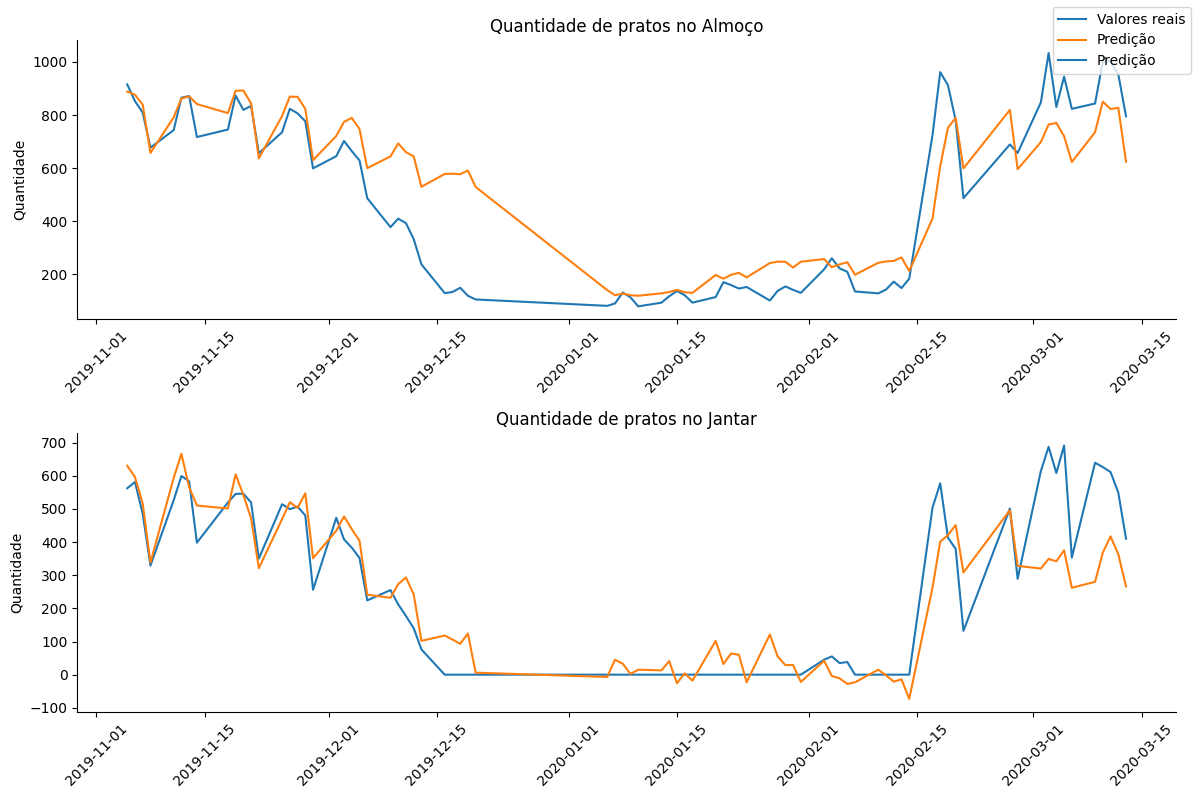

In [36]:
get_almoco_and_janta_plot(test_df, predicted_df)